In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle

In [5]:
df=pd.read_csv(r"C:\Users\TULASI\Downloads\large_house_price_dataset.csv")
df

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
0,3674,3,1,2,1,28,22674207
1,1360,2,2,3,2,20,8910116
2,1794,1,1,2,0,29,10412863
3,1630,1,4,3,2,7,11906611
4,1595,3,4,2,0,13,10903562
...,...,...,...,...,...,...,...
4995,3300,2,2,2,2,26,20789932
4996,771,2,4,3,1,0,6675496
4997,2322,5,4,3,2,6,17099165
4998,3485,2,2,1,0,21,21569046


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop_duplicates(inplace=True)

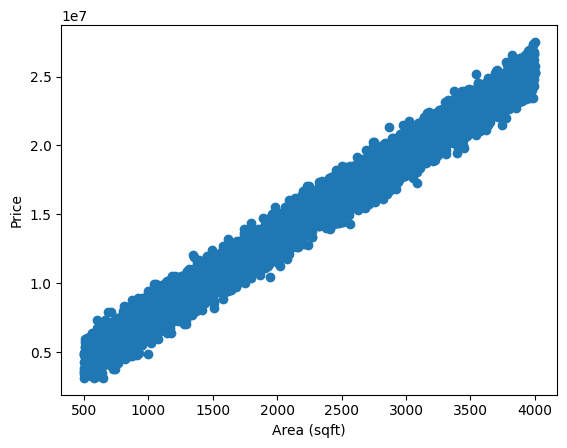

In [9]:
plt.scatter(df['Area'], df['Price'])
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.show()

In [12]:
X=df[['Area','Bedrooms','Bathrooms','Floors','Parking','Age']]
y=df['Price']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
lr=LinearRegression()
lr.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [16]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [17]:
print("Train R2:",r2_score(y_train,y_train_pred))
print("Test R2:", r2_score(y_test,y_test_pred))

Train R2: 0.997723882726607
Test R2: 0.9977531424848898


In [19]:
mae= mean_absolute_error(y_test,y_test_pred)
mse= mean_squared_error(y_test,y_test_pred)
rmse= np.sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 246078.8163888873
MSE: 80940652032.03755
RMSE: 284500.70655806386


In [20]:
ridge=Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
print("Ridge R2:", r2_score(y_test,ridge_pred))

Ridge R2: 0.9977530845924982


In [21]:
X_train.shape

(4000, 6)

In [22]:
lasso=Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred=lasso.predict(X_test)
print("Lasso R2:", r2_score(y_test,lasso_pred))

Lasso R2: 0.9977531423822672


In [23]:
models = {
    "Linear": r2_score(y_test, y_test_pred),
    "Ridge": r2_score(y_test, ridge_pred),
    "Lasso": r2_score(y_test, lasso_pred)
}

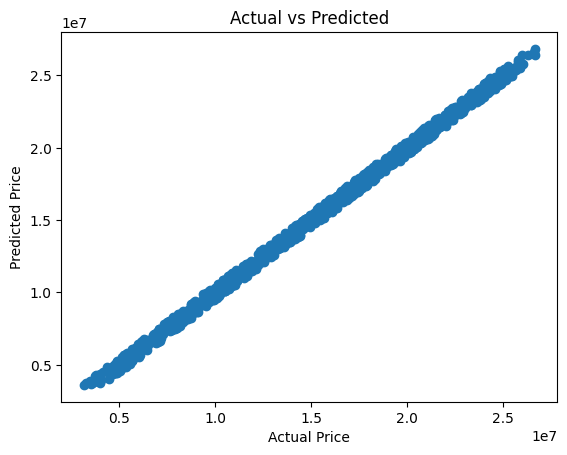

In [24]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [25]:
with open("model.pkl","wb") as file:
    pickle.dump(ridge, file)
print("Model Saved Successfully")

Model Saved Successfully
